### Analysis on how school education KPIs changed with education expenditure 

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
# set working directory
import os
os.chdir('D:\\1. Ayesha\\Other\\MSc\\Semester 1\\Data Science - CS5617\\Group Project\\Expenditure Vs. Primary & Secondary Education')

In [84]:
# import data
data = pd.read_csv('Education_Data.csv')
data.head(n=12)

,Item,Total_Schools,Government_Schools,National_Schools,Other_Schools,Private,Pirivenas,Total_Students,Government_Schools_Students,Other_Schools_Students,...,Total_Expenditure_on_Education,Current_Expenditure,Capital_Expenditure,Expenditure_as_percentage_of_GDP,University Education,Universities,Students,Lecturers,Number_Graduating,New_Admissions
0,2000,10615,9976,317,639,78,561,4340412,4193908,146504,...,30929,23794,7135,2.46,NaN,13,48296,3241,9374,11805
1,2001,10552,9891,320,661,78,583,4337258,4187146,150112,...,28283,23448,4835,2.01,NaN,13,48212,3268,8896,11962
2,2002,10508,9829,323,679,80,599,4179217,4027075,152142,...,37209,31161,6048,2.35,NaN,13,48666,3390,9027,12144
3,2003,10473,9790,323,683,85,598,4098465,3941685,156780,...,39116,31673,7443,2.15,NaN,13,64291,3543,10730,25471
4,2004,10501,9765,324,736,85,651,4028186,3870628,157558,...,42340,33792,8548,2.03,NaN,13,64801,3725,10525,13396
5,2005,10461,9723,324,738,85,653,4103512,3942077,161435,...,63557,50697,12860,2.59,NaN,15,66386,3875,7154,14520
6,2006,10461,9714,327,747,93,654,4000714,3837548,163166,...,78344,61144,17200,2.67,NaN,15,65206,4016,11713,16585
7,2007,10430,9678,328,752,94,658,4111022,3942185,168837,...,92540,72592,19948,2.59,NaN,15,66996,4304,12005,17196
8,2008,10445,9662,330,783,92,691,4101509,3930374,171135,...,100083,77141,22942,2.27,NaN,15,66891,4452,12958,20069
9,2009,10205,9410,334,795,98,697,4037896,3864824,173072,...,100506,82414,18092,2.08,NaN,15,68768,4735,13952,20846


## Descriptives

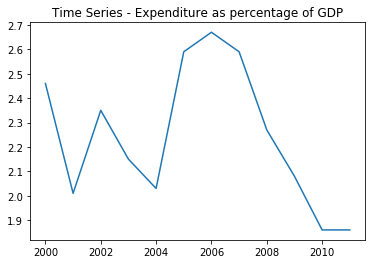

In [79]:
plt.plot('Item', 'Total_Expenditure_on_Education', data=data)
plt.title('Time Series - Total Expenditure on Education')
plt.show()

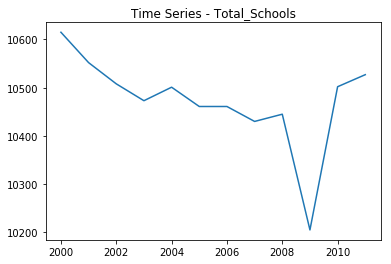

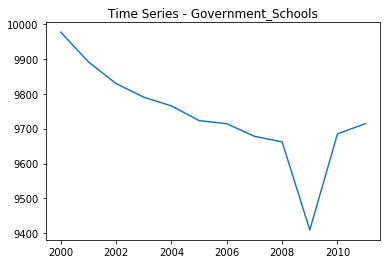

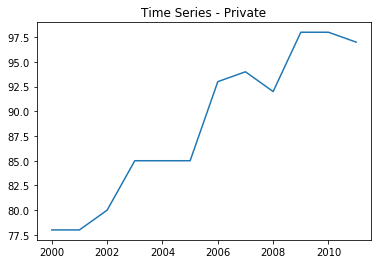

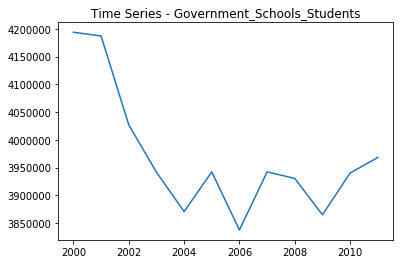

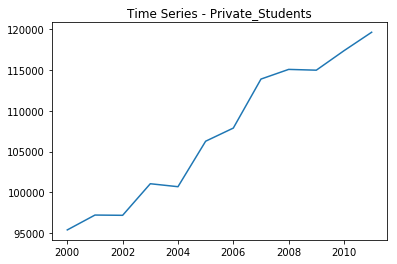

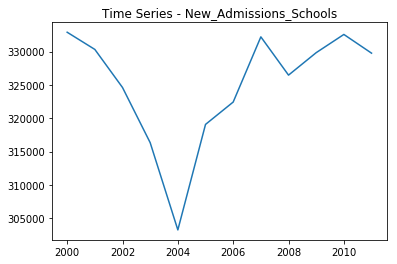

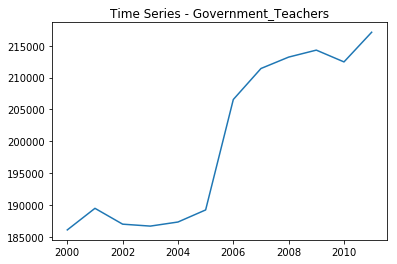

In [72]:
# schools
for v in ['Total_Schools','Government_Schools','Private','Government_Schools_Students','Private_Students','New_Admissions_Schools','Government_Teachers']:
    plt.plot('Item', v, data=data)
    plt.title('Time Series - '+v)
    plt.show()


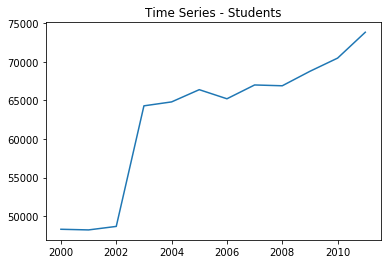

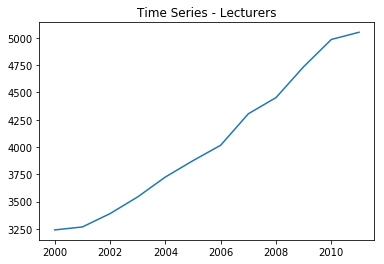

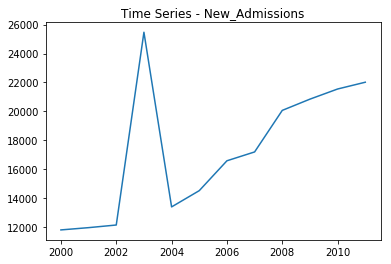

In [73]:
['Students','Lecturers','New_Admissions']
# unis
for v in ['Students','Lecturers','New_Admissions']:
    plt.plot('Item', v, data=data)
    plt.title('Time Series - '+v)
    plt.show()

## Regression Models

#### Regression - Schools

In [23]:
import statsmodels.api as sm # import statsmodels 

# schools
for v in ['Total_Schools','Government_Schools','Private','Government_Schools_Students','Private_Students','New_Admissions_Schools','Government_Teachers']:
    X = data['Total_Expenditure_on_Education'] ## X usually means our input variables (or independent variables)
    y = data[v] ## Y usually means our output/dependent variable
    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model


    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    # Print out the statistics
    print('\n------- Dependent Variable: {}-----\n'.format(v),model.summary(),'\n','\n','\n')


------- Dependent Variable: Total_Schools-----
                             OLS Regression Results                            
Dep. Variable:          Total_Schools   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.812
Date:                Fri, 22 Mar 2019   Prob (F-statistic):              0.124
Time:                        00:58:50   Log-Likelihood:                -70.110
No. Observations:                  12   AIC:                             144.2
Df Residuals:                      10   BIC:                             145.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only v

#### Regression - Universities

In [42]:
import statsmodels.api as sm # import statsmodels 

# unis
for v in ['Students','Lecturers','New_Admissions']:
    X = data['Total_Expenditure_on_Education'] ## X usually means our input variables (or independent variables)
    y = data[v] ## Y usually means our output/dependent variable
    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model


    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    # Print out the statistics
    print('\n------- Dependent Variable: {}-----\n'.format(v),model.summary(),'\n','\n','\n')


------- Dependent Variable: Students-----
                             OLS Regression Results                            
Dep. Variable:               Students   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     22.21
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           0.000825
Time:                        01:34:12   Log-Likelihood:                -118.79
No. Observations:                  12   AIC:                             241.6
Df Residuals:                      10   BIC:                             242.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


## Time Series Models

#### Time Series - Schools

In [82]:
# schools - time series
for v in ['Total_Schools','Government_Schools','Private','Government_Schools_Students','Private_Students','New_Admissions_Schools','Government_Teachers']:
    
    import statsmodels.api as sm
    model = sm.tsa.ARIMA(endog=data[v].astype('float64'), exog=data[['Total_Expenditure_on_Education']].astype('float64'),
                                 order = (0,0,1))
    model_fit = model.fit()
    print('\n------- Dependent Variable: {}-----\n'.format(v),model_fit.summary(),'\n','\n','\n')


------- Dependent Variable: Total_Schools-----
                               ARMA Model Results                              
Dep. Variable:          Total_Schools   No. Observations:                   12
Model:                     ARMA(0, 1)   Log Likelihood                 -68.077
Method:                       css-mle   S.D. of innovations             63.264
Date:                Fri, 22 Mar 2019   AIC                            144.155
Time:                        02:45:45   BIC                            146.095
Sample:                             0   HQIC                           143.437
                                                                              
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.058e+04     20.744    509.862      0.000    1.05e+04    1.06e+04
Total_Expenditure_on_E

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)



------- Dependent Variable: Government_Schools-----
                               ARMA Model Results                              
Dep. Variable:     Government_Schools   No. Observations:                   12
Model:                     ARMA(0, 1)   Log Likelihood                 -69.419
Method:                       css-mle   S.D. of innovations             70.748
Date:                Fri, 22 Mar 2019   AIC                            146.839
Time:                        02:45:45   BIC                            148.778
Sample:                             0   HQIC                           146.120
                                                                              
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           9953.8328     23.197    429.104      0.000    9908.368    9999.298
Total_Expenditure


------- Dependent Variable: Government_Teachers-----
                                ARMA Model Results                              
Dep. Variable:     Government_Teachers   No. Observations:                   12
Model:                      ARMA(0, 1)   Log Likelihood                -114.660
Method:                        css-mle   S.D. of innovations           3412.659
Date:                 Fri, 22 Mar 2019   AIC                            237.319
Time:                         02:45:46   BIC                            239.259
Sample:                              0   HQIC                           236.601
                                                                               
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.736e+05   2649.539     65.538      0.000    1.68e+05    1.79e+05
Total_Ex

#### Time Series - Universities

In [83]:
# Unis - time series
for v in ['Students','Lecturers','New_Admissions']:
    
    import statsmodels.api as sm
    model = sm.tsa.ARIMA(endog=data[v].astype('float64'), exog=data[['Total_Expenditure_on_Education']].astype('float64'),
                                 order = (0,0,1))
    model_fit = model.fit()
    print('\n------- Dependent Variable: {}-----\n'.format(v),model_fit.summary(),'\n','\n','\n')


------- Dependent Variable: Students-----
                               ARMA Model Results                              
Dep. Variable:               Students   No. Observations:                   12
Model:                     ARMA(0, 1)   Log Likelihood                -117.331
Method:                       css-mle   S.D. of innovations           4228.021
Date:                Fri, 22 Mar 2019   AIC                            242.662
Time:                        02:45:53   BIC                            244.602
Sample:                             0   HQIC                           241.944
                                                                              
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           4.676e+04   4010.618     11.659      0.000    3.89e+04    5.46e+04
Total_Expenditure_on_Educat

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)



------- Dependent Variable: Lecturers-----
                               ARMA Model Results                              
Dep. Variable:              Lecturers   No. Observations:                   12
Model:                     ARMA(0, 1)   Log Likelihood                 -73.090
Method:                       css-mle   S.D. of innovations             96.063
Date:                Fri, 22 Mar 2019   AIC                            154.180
Time:                        02:45:54   BIC                            156.119
Sample:                             0   HQIC                           153.461
                                                                              
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2761.7024    120.265     22.963      0.000    2525.986    2997.418
Total_Expenditure_on_Educa